<h1>Hello World of Deep Learning</h1>

In [91]:
#For getting the mnist handwritten dataset
from keras.datasets import mnist

#We will be using the methods present inside the ImageDataGenerator class to feed our MNIST data to the NN
from keras.preprocessing.image import ImageDataGenerator

#Importing pyplot for data visualization
import matplotlib.pyplot as plt
#Setting matplotlib as inline will display the corresponding graph below the cell itself
%matplotlib inline

#import
import random

#Importing DL libraries
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import MaxPool2D
from keras.models import Sequential

from keras.utils import np_utils

import numpy as np

In [92]:
#Loading the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Before we push our data to the Neural network, let us visualize it

In [93]:
print(f"x_train shape: {x_train.shape}\t\ty_train.shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}\t\ty_test.shape: {y_test.shape}")


x_train shape: (60000, 28, 28)		y_train.shape: (60000,)
x_test shape: (10000, 28, 28)		y_test.shape: (10000,)


<p>It's clear that the Numpy array 'x_train' returned by the function load_data has the shape (m_training examples, image rows, image_cols)</p>

Let us see some sample images

<Figure size 432x288 with 0 Axes>

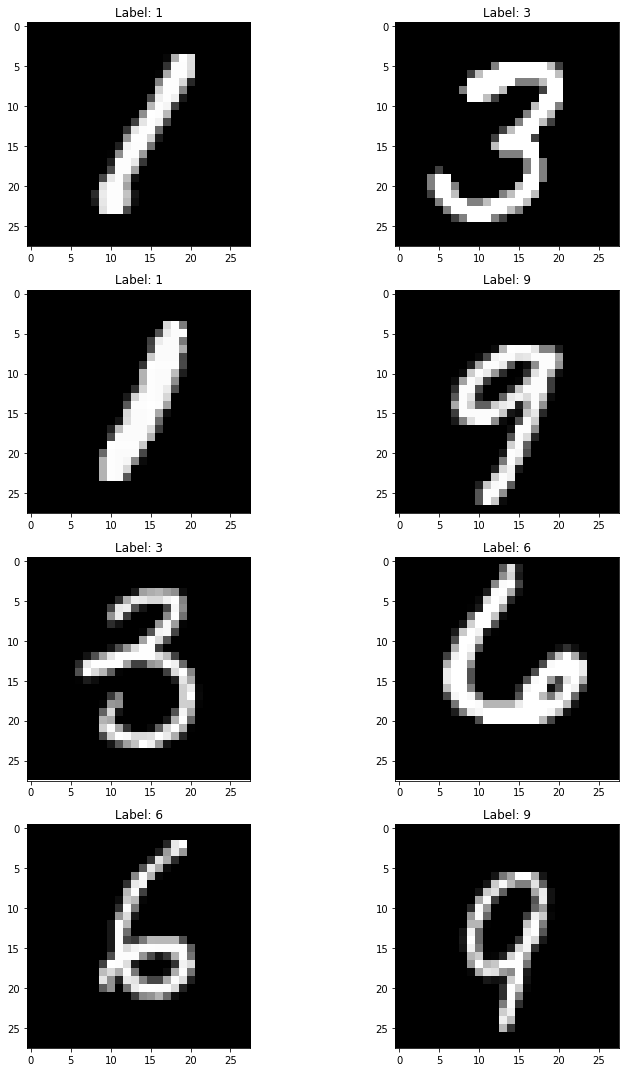

In [94]:
#Making a pyplot figure
plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(4,2, figsize=(15,15)) 

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
for i in range(4):
    for j in range(2):
        num = random.randint(0,500)
        axarr[i][j].imshow(x_train[num], cmap='gray', interpolation='none')
        axarr[i][j].set_title(f'Label: {y_train[num]}')
        plt.tight_layout()
        

In [95]:
#Reshaping X so as to make it compatible with the way Keras accepts Images into the NN.
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')
#Data Preprocessing to make the mean 0. It speeds up NN training time.
x_train = x_train/255
x_test= x_test/255

#Since there are 10 digits, n_classes = 10
n_classes = 10
print(f"Raw labels: {y_train[0]}")

'''Since y_train and y_test consist of only digits at this point, we will be converting it to one-hot matrix,
to feed it to the NN
'''
y_train = np_utils.to_categorical(y_train, num_classes=n_classes)
y_test = np_utils.to_categorical(y_test, num_classes=n_classes)

print(f"Example of a one-hot matrix: {y_train[0]}")

print("\nAfter reshaping")
print(f"x_train shape: {x_train.shape}\t\ty_train.shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}\t\ty_test.shape: {y_test.shape}")

Raw labels: 5

Example of a one-hot matrix: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
After reshaping
x_train shape: (60000, 28, 28, 1)		y_train.shape: (60000, 10)
x_test shape: (10000, 28, 28, 1)		y_test.shape: (10000, 10)


As you can see, the same value 5 s not represented as [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]  <br>
Notice the 1 on the 5th index, since the label was 5, initially.

In [96]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, input_shape=(28, 28, 1), activation='relu', use_bias=True))
model.add(MaxPool2D(2,2))

model.add(Conv2D(filters=32, kernel_size=3,activation='relu', use_bias=True))
model.add(MaxPool2D(2,2))

model.add(Flatten())

model.add(Dense(32, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 32)                25632     
_________________________________________________________________
dense_14 (Dense)             (None, 10)               

In [97]:
#To reduce the learning rate once the loss reaches a plateau
from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)



Now we compile the model. We're just specifying the loss, type of optimizer and the metrics to be displayed while
Training. No training will take place if we run the cell below.

In [100]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [55]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, verbose=1, batch_size=128)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 21s 355us/step - loss: 0.3097 - accuracy: 0.9099 - val_loss: 0.0917 - val_accuracy: 0.9730
Epoch 2/5
60000/60000 [==============================] - 20s 338us/step - loss: 0.0838 - accuracy: 0.9744 - val_loss: 0.0553 - val_accuracy: 0.9829
Epoch 3/5
60000/60000 [==============================] - 20s 340us/step - loss: 0.0583 - accuracy: 0.9819 - val_loss: 0.0484 - val_accuracy: 0.9844
Epoch 4/5
60000/60000 [==============================] - 20s 339us/step - loss: 0.0466 - accuracy: 0.9854 - val_loss: 0.0458 - val_accuracy: 0.9851
Epoch 5/5
60000/60000 [==============================] - 20s 340us/step - loss: 0.0402 - accuracy: 0.9876 - val_loss: 0.0403 - val_accuracy: 0.9871


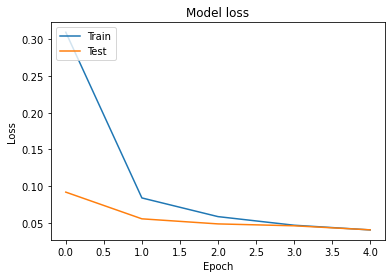

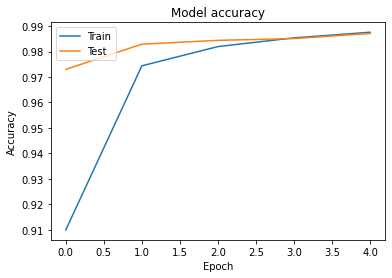

In [56]:

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


Now that our model has been trained, let us predict values


    

0 0


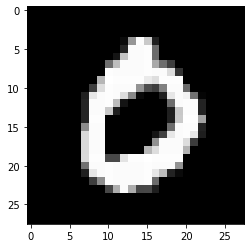

In [57]:
img_input = x_test[3]
img_input = img_input.reshape(1, 28, 28, 1)
output = model.predict(img_input)
img_plot = x_test[3].reshape(28, 28)
original_label = np.argmax(y_test[3])
predicted_label = (np.argmax(output))
plt.imshow(img_plot, cmap = 'gray')
print(original_label, predicted_label)

<Figure size 432x288 with 0 Axes>

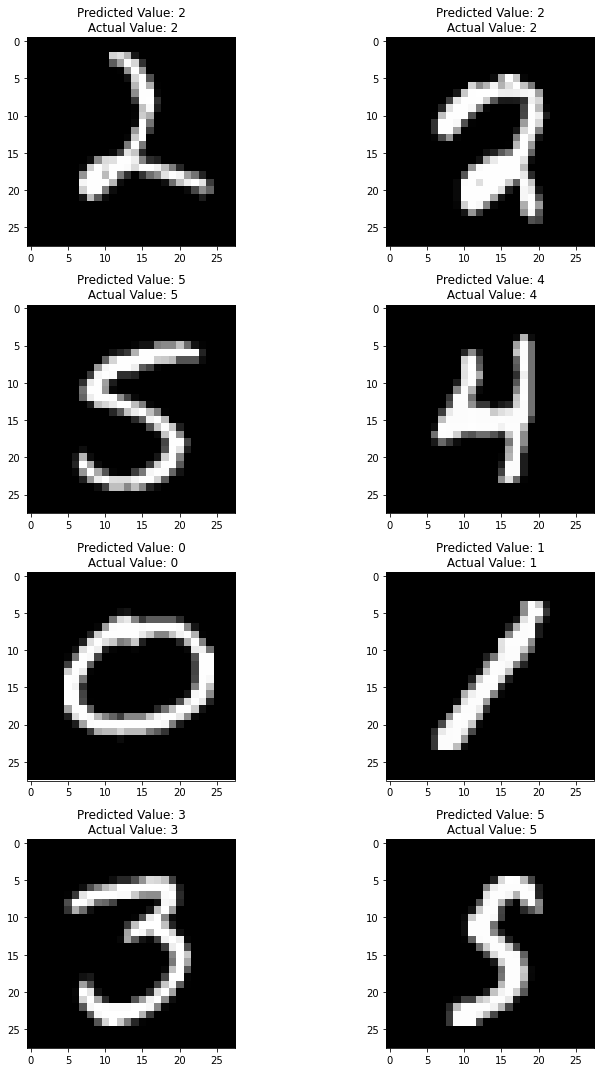

In [58]:
fig = plt.figure()
f, axarr = plt.subplots(4,2, figsize=(15,15))
for i in range(4):
    for j in range(2):
        num = random.randint(0, 10000)
        img = x_test[num].reshape(28, 28)
        img_input = img.reshape(1, 28, 28, 1)
        actual_value = np.argmax(y_test[num])
        output = model.predict(img_input)
        prediction = np.argmax(output)
        axarr[i, j].imshow(img, cmap='gray')
        axarr[i, j].set_title(f"Predicted Value: {prediction}\n Actual Value: {actual_value}")
        plt.tight_layout()